In [2]:
import pandas as pd

df = pd.read_csv("booking_com-travel_sample.csv", encoding='utf-8')
df.head(4)

,address,city,country,crawl_date,hotel_brand,hotel_description,hotel_facilities,hotel_star_rating,image_count,latitude,...,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,special_tag,state,uniq_id,zone
0,"KHIRSU, 246147 Pauri, India – Great location -",pauri,India,2016-09-01,NaN,Khirsu By GMVN offers accommodation in Pauri. ...,Bathroom:Toilet paper|Linen|Towels|Bathroom|To...,NaN,3.0,30.123749,...,Economy Double Room,Hotel Mandakini,NaN,NaN,NaN,http://www.booking.com/,Share,Uttarakhand,a5ea72415f8007fcbe65759830fdd3d9,NaN
1,"Kaathadimattam, Balacola Post, NEAR Siva Tea F...",ooty,India,2016-09-01,NaN,"Situated in Ooty in the Tamil Nadu Region, 8 k...",Bathroom:Toilet paper|Linen|Towels|Bidet|Towel...,3 stars,NaN,11.329595,...,British Empire Chalet,Treebo Yantra Leisures|Western Valley Resorts|...,5,7.6,Location:8.5|Staff:8|Cleanliness:7.5|Comfort:7...,http://www.booking.com/,Share,Tamil Nadu,7e0b055417271bbd9dae902f3e231ed4,NaN
2,"PIPALKOTI, 246472 Pīpalkoti, India – Show map",pīpalkoti,India,2016-09-01,NaN,TRH Pipalkoti offers accommodation in Pīpalkot...,Bathroom:Toilet paper|Linen|Towels|Bathroom•Vi...,NaN,4.0,30.429540,...,Economy Double Room,TRH Joshimath (New),NaN,NaN,NaN,http://www.booking.com/,Share,Uttarakhand,72c0af09827bbb620365aa5df523ba1d,NaN
3,"1 KARIYIL HOUSE KUMARAKOM NORTH PO KOTTAYAM, 6...",kumarakom,India,2016-09-01,NaN,"Swasti house boat 2 is located in Kumarakom, 3...",Bathroom:Toilet paper|Towels|Bath|Shower•Bedro...,NaN,2.0,9.616057,...,Deluxe Room,NaN,NaN,NaN,NaN,http://www.booking.com/,Share,Kerala,eb6fd33d99aa4a8088caa8f3ecb08275,NaN


In [3]:
city_lat_long_count = df.groupby('city').first().loc[:, ['longitude', 'latitude']].assign(n = df.groupby('city').city.count())
city_lat_long_count.head()

,longitude,latitude,n
city,,,
abdullāpuram,79.669628,12.782167,3
adūr,76.765792,9.145409,2
agonda,73.989487,15.038045,8
agra,78.053899,27.165095,81
aguada,73.766857,15.527527,2


In [4]:
import folium

SF_COORDINATES = (20.5937, 78.9629)
map = folium.Map(location=SF_COORDINATES, zoom_start=5)
tooltip = 'Click me!'
max_n_stays = max(city_lat_long_count['n'].values)

for index, row in city_lat_long_count.iterrows():
    popup_name = index + " Hotel Count: " + str(row['n'])
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius = (row['n']/max_n_stays) * 50,
                    popup=popup_name, line_color='#3186cc', fill = True, color='indianred',
                    fill_color='#3186cc').add_to(map)
    
display(map)

In [5]:
hotel_brand_df = df['hotel_brand'].dropna().reset_index().drop('index', axis=1)
hotel_brand_count_df = hotel_brand_df.groupby(["hotel_brand"])["hotel_brand"].count().reset_index(name="count").sort_values(by=['count'], ascending=[False]).reset_index().drop('index', axis=1).head(10)
hotel_brand_count_df.head()

,hotel_brand,count
0,OYO Rooms,902
1,Vista Rooms,192
2,Club Mahindra,45
3,Treebo Hotels,38
4,Sarovar Hotels,19


Top ten hotel brands coverage in India


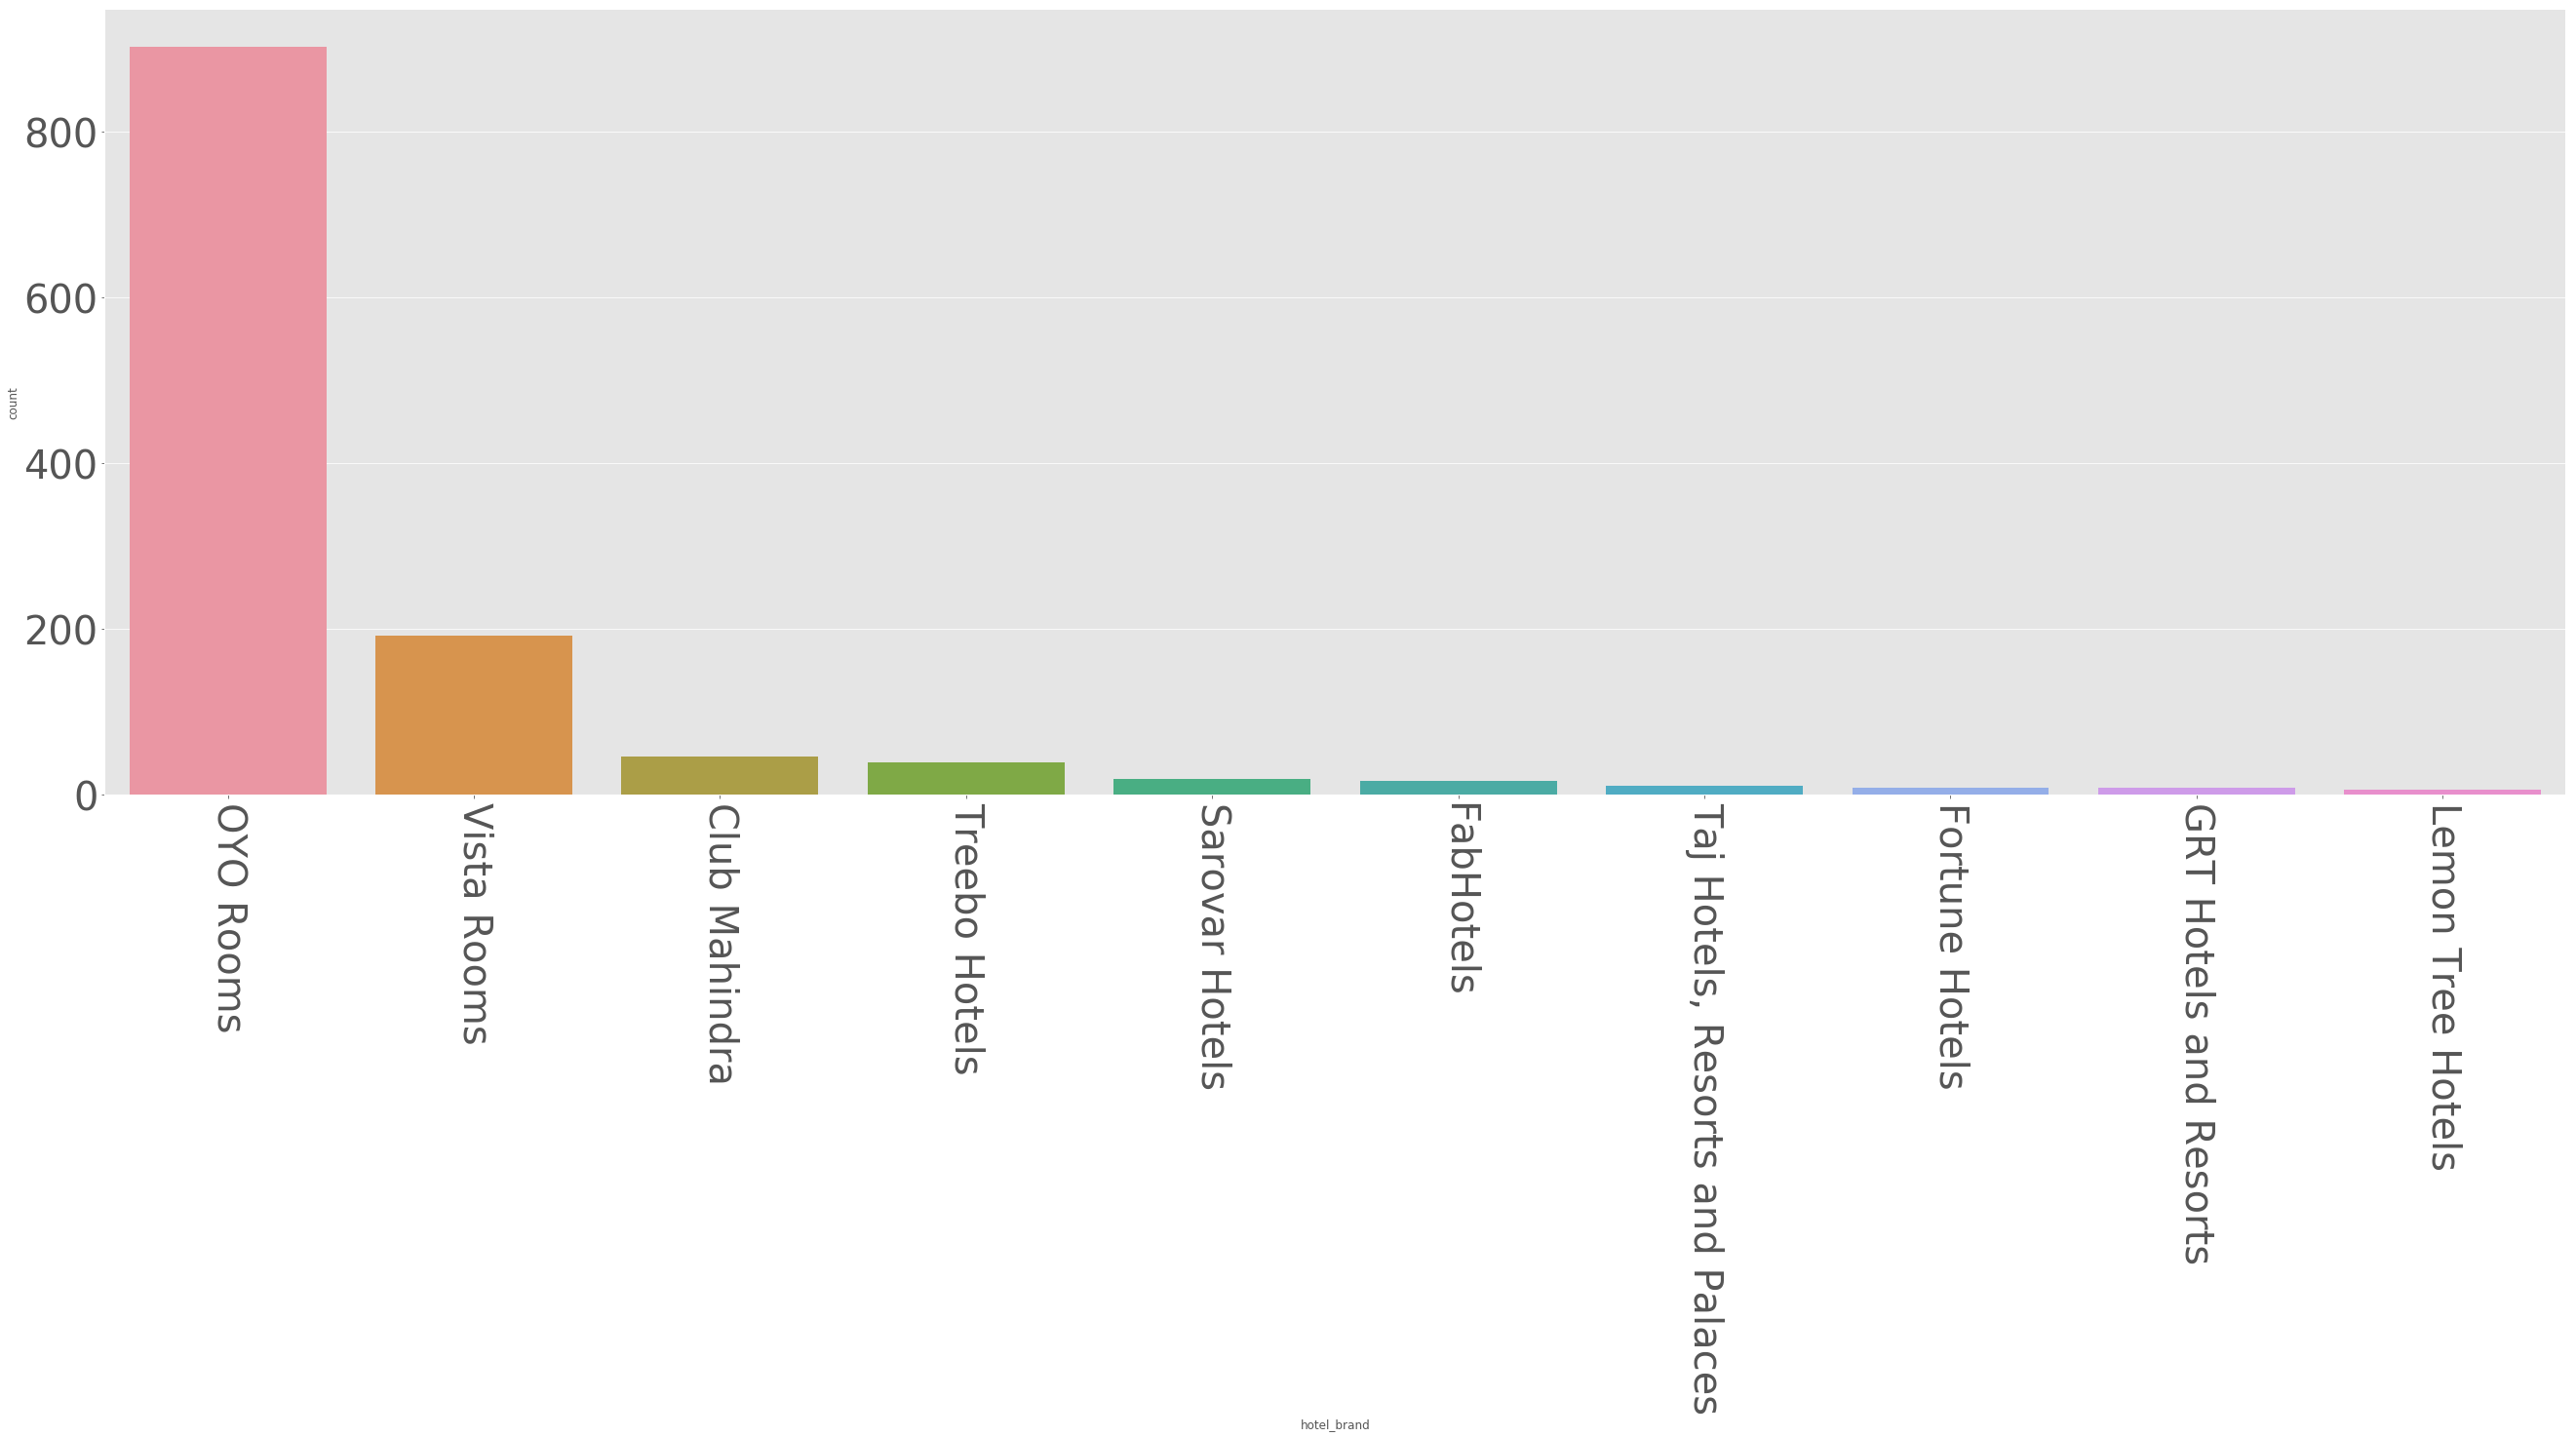

In [6]:
import seaborn as sns
import matplotlib
from numpy import median
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
print "Top ten hotel brands coverage in India"
sns.factorplot(x = 'hotel_brand', y = 'count', data=hotel_brand_count_df, kind='bar', size=12, aspect=3)
plt.xticks(rotation=-90,  size = 40)
plt.yticks(size = 40)
plt.show()

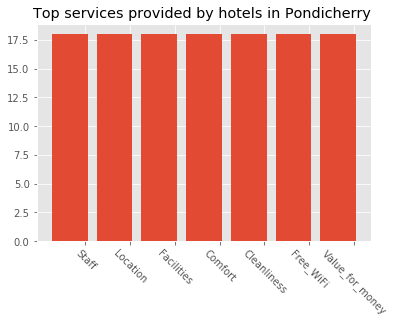

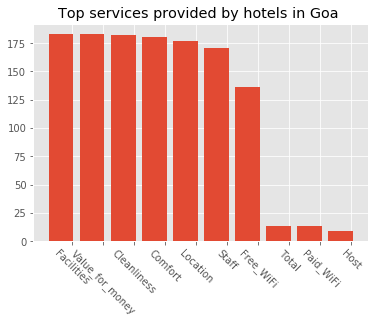

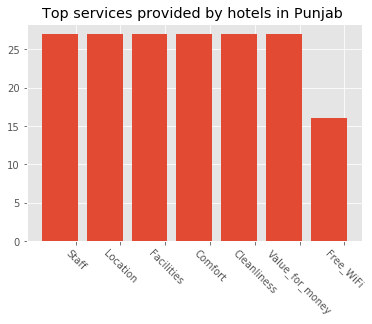

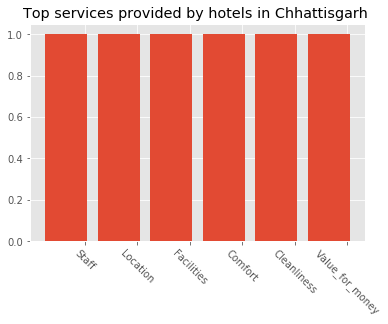

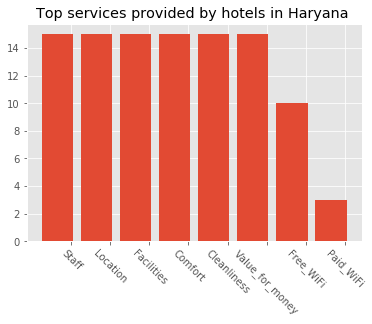

In [7]:
import ast 
import itertools
import numpy as np
import nltk
import matplotlib.pyplot as plt
from collections import Counter

def get_word_cloud(group):
    category_data_list = []
    for each_category_group in group['site_stay_review_rating']:
        category_list = each_category_group.split('|')
        category_word_list = []
        for each_category in category_list:
            data_split = each_category.split(':')
            category = data_split[0].strip().replace(' ','_')
            category_data_list.append(category)
    return category_data_list

site_review_rating_df = df[["site_stay_review_rating","state"]].dropna().reset_index().drop("index", axis=1)
site_review_rating_state_grouped = site_review_rating_df.groupby(['state'])

state_category_dict = {}

for name, group in site_review_rating_state_grouped:
    word_bag = get_word_cloud(group)
    state_category_dict[name] = word_bag

five_pairs = {k: state_category_dict[k] for k in state_category_dict.keys()[:5]}
total_state = len(state_category_dict)


for i, (key, value) in enumerate(five_pairs.iteritems()):

    word_group = value
    counts = Counter(word_group)
    
    labels, values = zip(*counts.items())
    indSort = np.argsort(values)[::-1]
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]
    
    indexes = np.arange(len(labels))
    bar_width = 0.35
    plt.bar(indexes, values)
    plt.title("Top services provided by hotels in {} ".format(key))

    plt.xticks(indexes + bar_width, labels, rotation=-45)
    plt.show()